In [1]:
import pandas as pd
import numpy as np
import random as rn
import datetime
import re
import os
from cade.cade import CADE
from gensim.models.word2vec import Word2Vec
from scipy.spatial.distance import cosine, euclidean
from sklearn.metrics.pairwise import cosine_similarity
import itertools
from tqdm import tqdm
import tqdm.notebook as tq
import matplotlib.pyplot as plt
from argparse import ArgumentParser
import itertools
import statistics
from collections import defaultdict

tqdm.pandas()

In [2]:
def step_one_pairs(list_of_items):
    return [(list_of_items[i],list_of_items[i+1]) for i in range(len(list_of_items)-1)]

In [2]:
run=0
vector_size1=300
vector_size2 = 100
diter=5
siter=5
diter2=9
siter2=1
iterations=10
no_rows = 'all'

In [3]:
def all_possible_pairs(list_of_items):
    return list(itertools.combinations(list_of_items, 2))

all_pairs = all_possible_pairs(range(iterations))
print(all_pairs)
print(len(all_pairs))

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
45


In [4]:
compass_df = pd.read_csv('../out_files/stability_compass_run'+str(run)+'_iterations'+str(
    iterations)+'_diter'+str(diter)+'_siter'+str(siter)+'_size'+str(vector_size1)+'_rows'+str(no_rows)+'.csv')

compass_fc_df = pd.read_csv('../out_files/stability_compass_freq_cutoffs_run'+str(run)+'_iterations'+str(
    iterations)+'_diter'+str(diter)+'_siter'+str(siter)+'_size'+str(vector_size1)+'_rows'+str(no_rows)+'.csv')

goldberg_df = pd.read_csv('../out_files/stability_goldberg_run'+str(run)+'_iterations'+str(
    iterations)+'_size'+str(vector_size1)+'_rows'+str(no_rows)+'.csv')

procrustes_df = pd.read_csv('../out_files/stability_procrustes_run'+str(run)+'_iterations'+str(iterations)+
                           '_size'+str(vector_size1)+'_rows'+str(no_rows)+'.csv')

hamilton_df = pd.read_csv('../out_files/stability_hamilton_run'+str(run)+'_iterations'+str(
    iterations)+'_size'+str(vector_size1)+'_rows'+str(no_rows)+'.csv')

In [9]:
compass_df = compass_df.rename(columns={'top10neighbors_1st_decade': 'neighbors_t1', 
                                        'top10neighbors_2nd_decade':'neighbors_t2'})
print(compass_df.columns)
# print(compass_df.head(5))
print('--------------')


compass_fc_df = compass_fc_df.rename(columns={'top10neighbors_1st_decade': 'neighbors_t1',
                                                      'top10neighbors_2nd_decade':'neighbors_t2'})
print(compass_fc_df.columns)
# print(compass_freq_cutoffs_df.head(5))
print('--------------')


goldberg_df = goldberg_df.rename(columns={'score': 'semantic_similarity', 'decade':'decade_pair'})
print(goldberg_df.columns)
# print(goldberg_df.head(5))
print('--------------')


procrustes_df = procrustes_df.rename(columns={'top10neighbors_1st_decade': 'neighbors_t1',
                                              'top10neighbors_2nd_decade':'neighbors_t2'})
print(procrustes_df.columns)
# print(procrustes_df.head(5))
print('--------------')


hamilton_df = hamilton_df.rename(columns={'decade':'decade_pair', 'top25neighbors_1st_decade': 'neighbors_t1',
                                          'top25neighbors_2nd_decade':'neighbors_t2'})
print(hamilton_df.columns)
# print(hamilton_df.head(5))

Index(['iteration', 'decade_pair', 'word', 'semantic_similarity',
       'common_voc_size', 'neighbors_t1', 'neighbors_t2'],
      dtype='object')
--------------
Index(['iteration', 'decade_pair', 'word', 'semantic_similarity',
       'neighbors_t1', 'neighbors_t2', 'common_voc_size'],
      dtype='object')
--------------
Index(['iteration', 'decade_pair', 'word', 'semantic_similarity',
       'neighbors_t1', 'neighbors_t2'],
      dtype='object')
--------------
Index(['iteration', 'decade_pair', 'word', 'semantic_similarity',
       'common_voc_size', 'neighbors_t1', 'neighbors_t2'],
      dtype='object')
--------------
Index(['iteration', 'decade_pair', 'word', 'semantic_similarity',
       'common_vocab', 'neighbors_t1', 'neighbors_t2', 'neighbors_union'],
      dtype='object')


[10, 20, 50, 100, 200, 500, 1000] [0.508888888888889, 0.6411111111111112, 0.7111111111111109, 0.7724444444444447, 0.7795555555555557, 0.8336444444444443, 0.8441555555555553]
[10, 20, 50, 100, 200, 500, 1000] [0.8355555555555557, 0.8566666666666669, 0.8368888888888891, 0.8633333333333335, 0.8585555555555552, 0.8654222222222221, 0.8730888888888888]
[10, 20, 50, 100, 200, 500, 1000] [0.6600000000000003, 0.7077777777777778, 0.7711111111111112, 0.7853333333333334, 0.8232222222222223, 0.8498222222222221, 0.8695777777777778]
[10, 20, 50, 100, 200, 500, 1000] [0.41111111111111104, 0.47666666666666657, 0.4973333333333333, 0.5588888888888889, 0.6094444444444445, 0.6668444444444445, 0.7047555555555555]
[10, 20, 50, 100, 200, 500, 1000] [0.6377777777777779, 0.6277777777777777, 0.6751111111111109, 0.704, 0.6882222222222221, 0.6686666666666666, 0.6506666666666665]


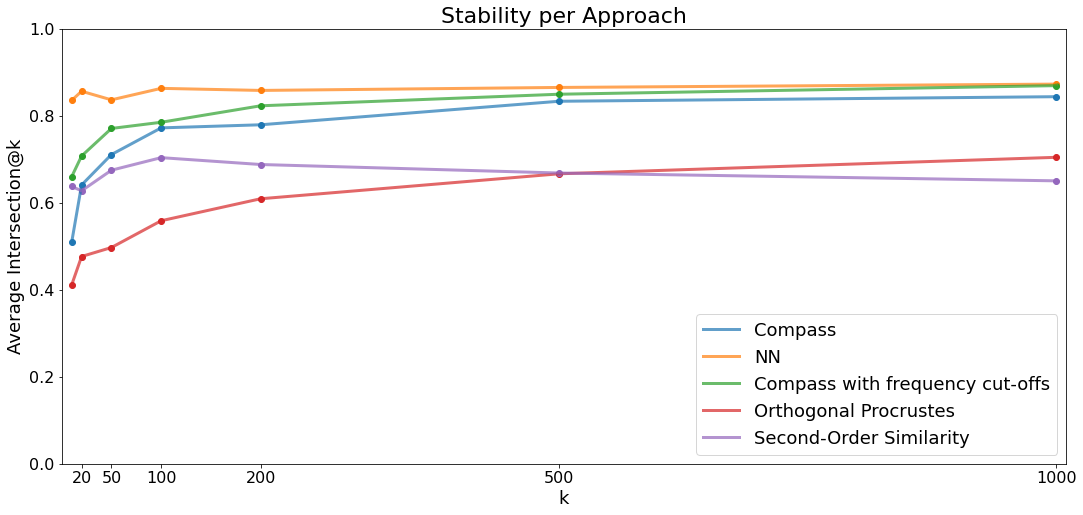

In [15]:
# Plot results

fig = plt.figure(figsize=(12, 4))

fig.set_size_inches(18, 8)

k=[10,20,50,100,200,500,1000]

all_dfs = {'Compass': compass_df, 'NN':goldberg_df, 'Compass with frequency cut-offs': compass_fc_df,
          'Orthogonal Procrustes': procrustes_df, 'Second-Order Similarity': hamilton_df}

for label, df in all_dfs.items():
    
    X = []
    Y = []
    
    for n in k:

        intersection_per_pair = []

        for pair in all_pairs:

            iteration_0_topk = df.loc[(df.iteration==pair[0])].sort_values('semantic_similarity', ascending=False).word.head(n)
            iteration_1_topk = df.loc[(df.iteration==pair[1])].sort_values('semantic_similarity', ascending=False).word.head(n)
            intersection = len(set(iteration_0_topk).intersection(set(iteration_1_topk)))
            intersection_per_pair.append(intersection/n)

        intersection_at_k = sum(intersection_per_pair) / len(intersection_per_pair)
        Y.append(intersection_at_k)
        X.append(n)

    print(X,Y)

    plt.scatter(X,Y)
    plt.plot(X,Y, label=label, linewidth=3, alpha=0.7)
#     plt.annotate(k[0], fontsize=10, xy=(10, 0), xytext=(10, -0.005)) #, arrowprops=dict(arrowstyle="simple")


plt.legend(loc=4, prop={'size': 18})
    
plt.gca().tick_params(axis='both', which='major', labelsize=16)
plt.ylim(0,1.)
plt.xlim(0,1010)
plt.xticks(k[1:])
plt.xlabel('k', fontsize=18)
plt.ylabel('Average Ιntersection@k', fontsize=18)
plt.title('Stability per Approach', fontsize=22)

plt.savefig('../out_files/stability_comparison.png', dpi=200,  bbox_inches='tight')



### Plot tool similarity in top-k results

[('Compass', 'NN'), ('Compass', 'Compass frequency cut-offs'), ('Compass', 'Orthogonal Procrustes'), ('Compass', 'Second-Order Similarity'), ('Compass', 'Compass frequency cut-offs 100D'), ('NN', 'Compass frequency cut-offs'), ('NN', 'Orthogonal Procrustes'), ('NN', 'Second-Order Similarity'), ('NN', 'Compass frequency cut-offs 100D'), ('Compass frequency cut-offs', 'Orthogonal Procrustes'), ('Compass frequency cut-offs', 'Second-Order Similarity'), ('Compass frequency cut-offs', 'Compass frequency cut-offs 100D'), ('Orthogonal Procrustes', 'Second-Order Similarity'), ('Orthogonal Procrustes', 'Compass frequency cut-offs 100D'), ('Second-Order Similarity', 'Compass frequency cut-offs 100D')]
10
20
50
100
200
500
1000
defaultdict(<function <lambda> at 0x7fb1048e20d0>, {('Compass', 'NN'): defaultdict(<class 'int'>, {10: 0.0, 20: 0.0, 50: 0.022, 100: 0.019999999999999997, 200: 0.0115, 500: 0.008400000000000001, 1000: 0.0183}), ('Compass', 'Compass frequency cut-offs'): defaultdict(<class 

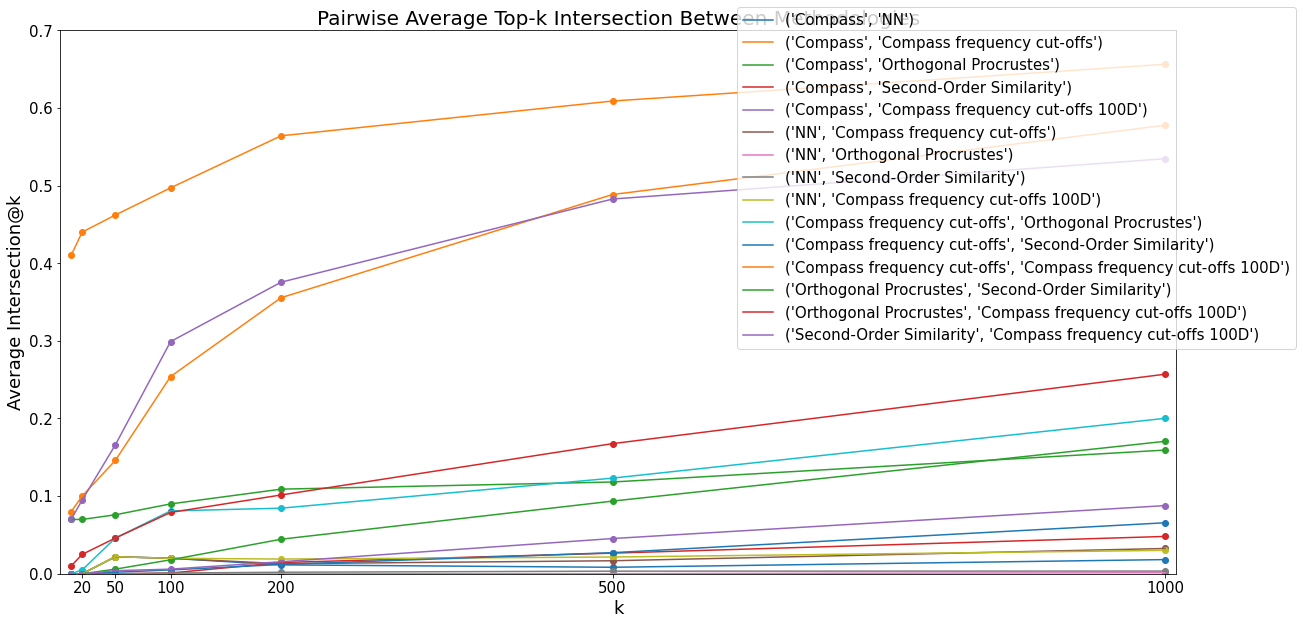

In [8]:
# Plot results
topn_dict = {}
X = []
Y = []

k=[10,20,50,100,200,500,1000]
all_dfs = {'Compass': compass_df, 'NN':goldberg_df, 'Compass frequency cut-offs': compass_fc_df,
          'Orthogonal Procrustes': procrustes_df, 'Second-Order Similarity': hamilton_df, 'Compass frequency cut-offs 100D': compass_fc_df_100}

df_pairs = all_possible_pairs([key for key, value in all_dfs.items()])
print(df_pairs)

intersection_per_pair_per_n = defaultdict(lambda: defaultdict(int))

for n in k:
    print(n)

    for df_pair in df_pairs:

        topn_intersection_per_iteration = {}
        avg_intersections = []
        
        for iteration in range(iterations):
            
            df1 = all_dfs[df_pair[0]]
            subdf1 = df1.loc[(df1.iteration==iteration)]
            subdf1 = subdf1.sort_values('semantic_similarity', ascending=False).reset_index(drop=True)

            df2 = all_dfs[df_pair[1]]
            subdf2 = df2.loc[(df2.iteration==iteration)]
            subdf2 = subdf2.sort_values('semantic_similarity', ascending=False).reset_index(drop=True)

            intersection = len(set(subdf1.head(n).word.to_list()).intersection(set(subdf2.head(n).word.to_list())))
            avg_intersection = intersection/n
            avg_intersections.append(avg_intersection)
        
        if len(avg_intersections)==0:
            avg_pair_intersection==0
        else:
            avg_pair_intersection = sum(avg_intersections) / len(avg_intersections)
        #     intersection = len(set(topn_dict[0]).intersection(set(topn_dict[1])))
#         intersection = len(set(topn_list_of_lists[0]).intersection(*topn_list_of_lists))
    
        intersection_per_pair_per_n[df_pair][n] = avg_pair_intersection

    
print(intersection_per_pair_per_n)

fig = plt.figure(figsize=(15, 8))


for pair, values in intersection_per_pair_per_n.items():
    print(pair)
    X = values.keys()
    Y = values.values()
    plt.scatter(X,Y)
    plt.plot(X,Y)

plt.legend(intersection_per_pair_per_n.keys(), fontsize=15, loc='lower left', bbox_to_anchor=(0.6,0.4))
fig.set_size_inches(20, 10)
plt.gca().tick_params(axis='both', which='major', labelsize=15)
plt.ylim(0,0.7)
plt.xlim(0,1010)
plt.xticks(k[1:])

plt.xlabel('k', fontsize=18)
plt.ylabel('Average Intersection@k', fontsize=18)
plt.title('Pairwise Average Top-k Intersection Between Methodologies', fontsize=20)

plt.savefig('../out_files/pairwise_intersection.png', dpi=200,  bbox_inches='tight')


### Remove words with less than 200 occurences per decade

In [9]:
freq1990 = pd.read_csv('../out_files/freqs_for_semantic_shift_cleaned_data_decade1990.csv')
freq2010 = pd.read_csv('../out_files/freqs_for_semantic_shift_cleaned_data_decade2010.csv')

In [10]:
# freq1990.loc[freq1990.word=='νερομανα']
# freq2010.loc[freq2010.word=='νερομανα']

In [11]:
freq1990.columns = ['word', 'freq1990', 'percent1990']
freq2010.columns = ['word', 'freq2010', 'percent2010']

In [12]:
# print(freq2010.loc[(freq2010.word=='psi')])

### Top Changed Words per Decade

In [13]:
n = 100
at_least_in_any_decade = 50
all_dfs = {'Compass': compass_df, 'NN':goldberg_df, 'Compass fc': compass_fc_df,
          'Procrustes': procrustes_df, 'Second Order': hamilton_df}

csvs = []

for name, df in all_dfs.items():

    df_topn = df.loc[(df.iteration==0)]
    df_topn = df_topn[[ 'word', 'semantic_similarity', 'neighbors_t1', 'neighbors_t2']]

    df_topn = df_topn.merge(freq1990, how='left', on='word')
    df_topn = df_topn.merge(freq2010, how='left', on='word')

    # print('ffffffffffffffffffffffffffffffffffffffffff')
    df_topn['max_freq_of_any_decade'] = df_topn[['freq1990', 'freq2010']].max(axis=1)
    df_topn.drop(['freq1990', 'freq2010', 'percent1990', 'percent2010'], axis=1, inplace=True) 
    df_topn = df_topn.loc[df_topn.max_freq_of_any_decade>at_least_in_any_decade].head(n)
    print(name)
    new_name = name.lower().replace(' ', '_')
    new_name = new_name.replace('-', '')
    csv_path = '../out_files/'+new_name+'_top'+str(n)+'.csv'
    csvs.append(csv_path)

    df_topn.to_csv(csv_path, index=False)


Compass
NN
Compass fc
Procrustes
Second Order
Compass fc 100D


In [14]:
from pyexcel import merge_csv_to_a_book
import pyexcel_xls
import glob
print(csvs)

merge_csv_to_a_book(csvs, outfilename='../out_files/top'+str(n)+'_minfreq'+str(at_least_in_any_decade)+'.xls')
print('Created file ../out_files/top'+str(n)+'_minfreq'+str(at_least_in_any_decade)+'.xls')

['../out_files/compass_top100.csv', '../out_files/nn_top100.csv', '../out_files/compass_fc_top100.csv', '../out_files/procrustes_top100.csv', '../out_files/second_order_top100.csv', '../out_files/compass_fc_100d_top100.csv']
Created file ../out_files/top100_minfreq50.xls
